In [2]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import numpy.polynomial as polypy
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [3]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [33]:
# loading data
data = pd.read_csv(
    DATA_PATH + "microchip_tests.txt",
    header=None,
    names=("test1", "test2", "released")
)
# getting some info about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   test1     118 non-null    float64
 1   test2     118 non-null    float64
 2   released  118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


In [35]:
data.head(5)

,test1,test2,released
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [36]:
X = data.iloc[:, :2].values
y = data.iloc[:, 2].values

In [37]:
X

array([[ 0.051267 ,  0.69956  ],
       [-0.092742 ,  0.68494  ],
       [-0.21371  ,  0.69225  ],
       [-0.375    ,  0.50219  ],
       [-0.51325  ,  0.46564  ],
       [-0.52477  ,  0.2098   ],
       [-0.39804  ,  0.034357 ],
       [-0.30588  , -0.19225  ],
       [ 0.016705 , -0.40424  ],
       [ 0.13191  , -0.51389  ],
       [ 0.38537  , -0.56506  ],
       [ 0.52938  , -0.5212   ],
       [ 0.63882  , -0.24342  ],
       [ 0.73675  , -0.18494  ],
       [ 0.54666  ,  0.48757  ],
       [ 0.322    ,  0.5826   ],
       [ 0.16647  ,  0.53874  ],
       [-0.046659 ,  0.81652  ],
       [-0.17339  ,  0.69956  ],
       [-0.47869  ,  0.63377  ],
       [-0.60541  ,  0.59722  ],
       [-0.62846  ,  0.33406  ],
       [-0.59389  ,  0.005117 ],
       [-0.42108  , -0.27266  ],
       [-0.11578  , -0.39693  ],
       [ 0.20104  , -0.60161  ],
       [ 0.46601  , -0.53582  ],
       [ 0.67339  , -0.53582  ],
       [-0.13882  ,  0.54605  ],
       [-0.29435  ,  0.77997  ],
       [-0

<Axes: xlabel='test1', ylabel='test2'>

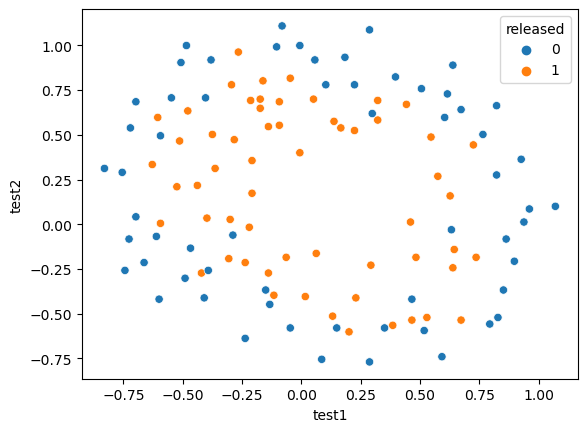

In [38]:
sns.scatterplot(data = data, x = 'test1', y = 'test2', hue = 'released')

In [83]:
def plot_boundary(clf, X, y, grid_step=.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
    np.arange(y_min, y_max, grid_step))

    # каждой точке в сетке [x_min, m_max]x[y_min, y_max]
    # ставим в соответствие свой цвет
    Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    
    Z = Z.reshape(xx.shape)
    
    #plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

In [65]:
poly = PolynomialFeatures(degree=14)
X_poly = poly.fit_transform(X)

'plt.scatter(X[y == 1, 0], X[y == 1, 1], c=\'green\', label=\'Выпущен\')\nplt.scatter(X[y == 0, 0], X[y == 0, 1], c=\'red\', label=\'Бракован\')\nplt.xlabel("Тест 1")\nplt.ylabel("Тест 2")\nplt.title(\'2 теста микрочипов. Логит с C=0.01\')\nplt.legend()\n\nprint("Доля правильных ответов классификатора на обучающей выборке:", \nround(logit.score(X_poly, y), 3))'

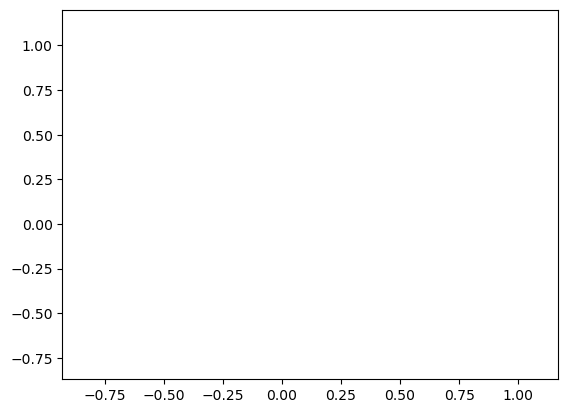

In [79]:
C = 1e-2
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X, y)
grid_step=.01

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                    np.arange(y_min, y_max, grid_step))
# каждой точке в сетке [x_min, m_max]x[y_min, y_max]
    # ставим в соответствие свой цвет
Z = logit.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
#plot_boundary(logit, X, y, grid_step=.01, poly_featurizer=poly)

"""plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов. Логит с C=0.01')
plt.legend()

print("Доля правильных ответов классификатора на обучающей выборке:", 
round(logit.score(X_poly, y), 3))"""

In [80]:
xx.shape

(208, 211)

In [81]:
g = np.c_[xx.ravel(), yy.ravel()]

In [67]:
zaza = poly.transform(np.c_[xx.ravel(), yy.ravel()])

<Axes: >

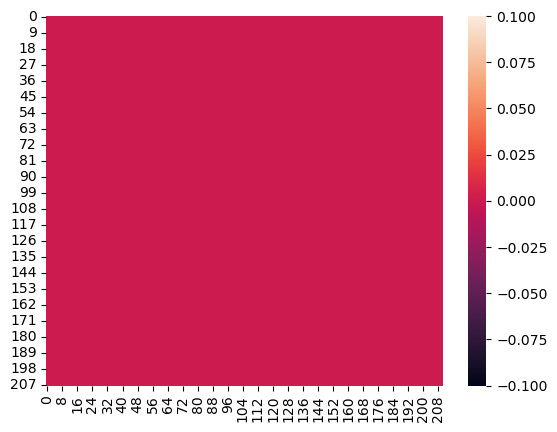

In [82]:
sns.heatmap(data = Z)

<Axes: >

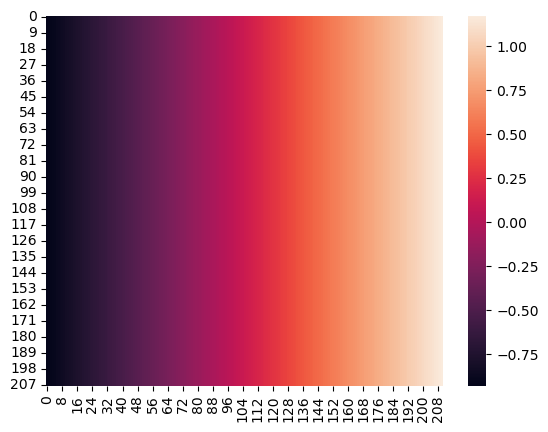

In [47]:
sns.heatmap(data = xx)

<Axes: >

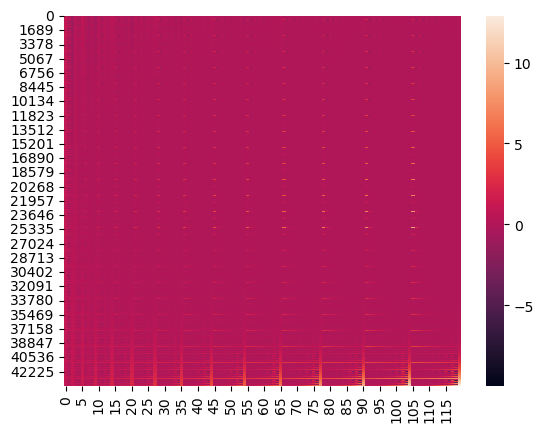

In [69]:
sns.heatmap(data = zaza)

<Axes: >

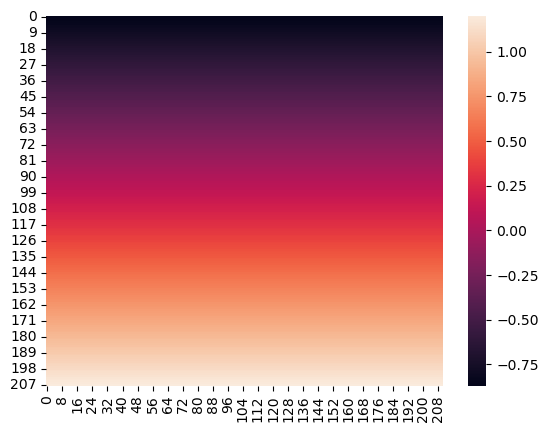

In [48]:
sns.heatmap(data = yy)

In [12]:
poly

PolynomialFeatures(degree=6)

In [85]:
poly

PolynomialFeatures(degree=14)

In [13]:
poly.fit(np.arange(14).reshape(2,-1))

PolynomialFeatures(degree=6)

In [14]:
p = polypy.Polynomial.fromroots([1,2,3])

In [15]:
print(p)

-6.0 + 11.0 x - 6.0 x**2 + 1.0 x**3


In [16]:
x = np.arange(1,21)

In [17]:
y = np.concatenate((x[:10], x[:10][::-1]))

In [18]:
y

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 10,  9,  8,  7,  6,  5,  4,
        3,  2,  1])

In [19]:
x[:11]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [20]:
x[:11][::-1]

array([11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [21]:
a = polypy.Polynomial.fit(x,y, 2)

In [22]:
a(2)

1.834586466165418

<Axes: >

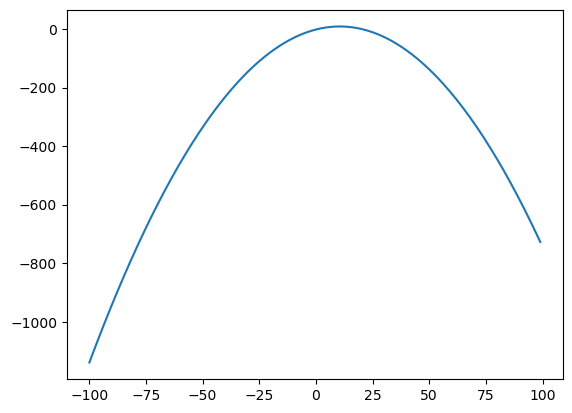

In [23]:
sns.lineplot(x = np.arange(-100, 100), y = a(np.arange(-100, 100)))

In [24]:
print(a*-1)

-8.625 + (2.61759822e-15) x + 8.48214286 x**2


In [25]:
p = PolynomialFeatures(degree = 2)

In [26]:
arr = np.array([[1, 2],
                [2, 1],
                [3, 3]])

In [27]:
p.fit(arr)

PolynomialFeatures()

In [28]:
p

PolynomialFeatures()

In [29]:
p.transform(arr)

array([[1., 1., 2., 1., 2., 4.],
       [1., 2., 1., 4., 2., 1.],
       [1., 3., 3., 9., 9., 9.]])

In [30]:
print("Nothing but scrap!")

Nothing but scrap!
